# Which innovatoin has the most articles attached

In [13]:
import matplotlib.pyplot as plt
from pathlib import Path
from src.utils import get_project_root

ROOT = get_project_root()

In [14]:
data_path = Path(ROOT, "data/raw-data/20230621_images")

In [15]:
data_path.is_dir()

True

In [20]:
subdir_counts = {}
for subdir in data_path.iterdir():
    if subdir.is_dir():
        count = len(list(subdir.glob("*")))
        subdir_counts[subdir.name] = count

In [31]:
sorted_counts = dict(
    sorted(subdir_counts.items(), key=lambda item: item[1], reverse=True)
)

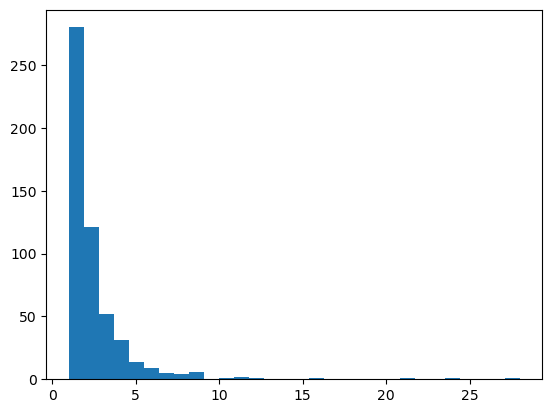

In [37]:
plt.hist(sorted_counts.values(), bins=30)

In [42]:
{k: sorted_counts[k] for k in list(sorted_counts)[:10]}

{'8448': 28,
 '9547': 24,
 '8808': 21,
 '6133': 16,
 '7529': 12,
 '7408': 11,
 '7540': 11,
 '8146': 10,
 '10307': 9,
 '6898': 9}

If we consider a published article as a measure of significance, does this mean that the more articles (count / length) cover an innovation, the more significant it is believed to be?

This could be fun to follow up on and to test further.
An easy start would be to see if the articles with more extensive coverage are novel from a firms perspective.

Further analysis could include sentiment analysis on these articles to find out if the sentiment about the innovation has changed over the period of publication, or between magazines.

Is it different magazines that cover the innovation, or is it mostly follow-up articles from the same magazine?

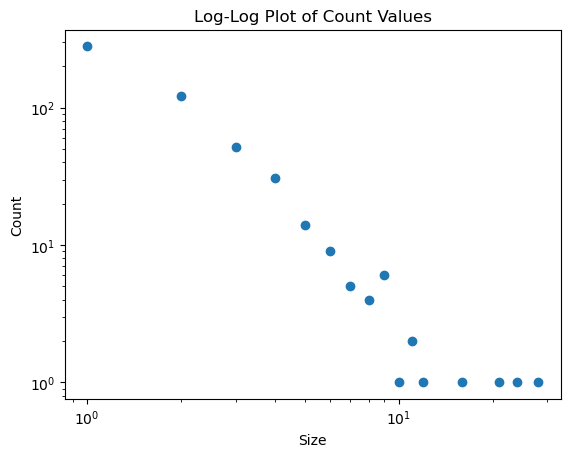

In [81]:
import numpy as np
from collections import Counter

freq = Counter(list(sorted_counts.values()))

log_counts = np.log10(list(freq.values()))
bins = np.logspace(np.min(log_counts), np.max(log_counts), 10)

x = list(freq.keys())
y = list(freq.values())

plt.scatter(x, y)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Size")
plt.ylabel("Count")
plt.title("Log-Log Plot of Count Values")
plt.show()

Is there prefrential attachment of articles to innovations, it would seem so and make sense theoretically.